In [29]:
tramos = []

precio_desde = 160000
precio_hasta = 1000000
intervalo = 50000
limite_superior = 1000001

while precio_desde <= limite_superior:
    tramo = f'?maxPrice={precio_hasta}&minPrice={precio_desde}/'
    tramos.append(tramo)
    precio_desde += intervalo
    precio_hasta += intervalo

# Imprimir la lista resultante
print(tramos)

['?maxPrice=1000000&minPrice=160000/', '?maxPrice=1050000&minPrice=210000/', '?maxPrice=1100000&minPrice=260000/', '?maxPrice=1150000&minPrice=310000/', '?maxPrice=1200000&minPrice=360000/', '?maxPrice=1250000&minPrice=410000/', '?maxPrice=1300000&minPrice=460000/', '?maxPrice=1350000&minPrice=510000/', '?maxPrice=1400000&minPrice=560000/', '?maxPrice=1450000&minPrice=610000/', '?maxPrice=1500000&minPrice=660000/', '?maxPrice=1550000&minPrice=710000/', '?maxPrice=1600000&minPrice=760000/', '?maxPrice=1650000&minPrice=810000/', '?maxPrice=1700000&minPrice=860000/', '?maxPrice=1750000&minPrice=910000/', '?maxPrice=1800000&minPrice=960000/']


In [ ]:
#https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arguelles/l?maxPrice=175000&minPrice=75000

#https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde&desde=180000&hasta=240000&orden=relevance&fromSearch=1&hitOrigin=listing

In [2]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
# Lista de distritos

tramos = []

precio_desde = 180000
precio_hasta = 500000
intervalo = 50000
limite_superior = 5000001

while precio_desde <= limite_superior:
    tramo = f'&desde={precio_desde}&hasta={precio_desde}&orden=relevance&fromSearch=1&hitOrigin=listing'
    tramos.append(tramo)
    precio_desde += intervalo
    precio_hasta += intervalo

# Imprimir la lista resultante
print(tramos)
distritos = ['Carabanchel', 'Ciudad Lineal', 'Latina', 'Villaverde', 'Retiro', 'Arganzuela', 'Usera', 'Vicálvaro', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Hortaleza', 'Tetuán', 'Chamberí', 'Moratalaz', 'Centro', 'Puente de Vallecas', 'San Blás-Canillejas', 'B.Salamanca', 'Barajas', 'Villa de Vallecas', 'Chamartín']

# URL base
url_base = 'https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s='
#'https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arguelles/l?maxPrice=2500000&minPrice=75000'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
}

#response = requests.get(url, headers=headers)


# Encabezados para la solicitud
#headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Almacena los datos recopilados
all_data_2 = []

# Bucle sobre los distritos
for distrito in distritos:
    for tramo in tramos:
    # Formatea la URL para el distrito actual
        url = url_base + distrito.replace(' ', '-').lower() + '/l'+ tramo

    # Realiza la solicitud
       # response = requests.get(url, headers=headers)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)

        print(f"URL: {url}\nStatus Code: {response.status_code}")

        print(f'URL: {url}')
        print(f'Status Code: {response.status_code}')

        if response.status_code == 200:
            # Parsea el contenido de la página con BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Encuentra todos los elementos <a> con la clase "item-link"
            title_elements = soup.find_all('h2', class_='ma-SharedText ma-AdCardV2-title ma-SharedText--m ma-SharedText--black ma-SharedText--numLines')
            prices_elements = soup.find_all('span', class_='ma-AdPrice-value ma-AdPrice-value--dark ma-AdPrice-value--heading--s')
            rooms_elements =soup.find_all('span', class_='ma-AdTag-label')
            bathrooms_elements = soup.find_all('span', class_='ma-AdTag-label')
            surface_elements = soup.find_all('span', class_='ma-AdTag-label')
            #garages_elements = soup.find_all('span', class_='re-CardTitle re-CardTitle--big')
            #elevator_elements = soup.find_all('span', class_='re-CardFeaturesWithIcons-feature-icon re-CardFeaturesWithIcons-feature-icon--elevator')
            #air_conditioner_elements = soup.find_all('span', class_='re-CardFeaturesWithIcons-feature-icon re-CardFeaturesWithIcons-feature-icon--air_conditioner')
            details_elements = soup.find_all('p', class_='ma-SharedText ma-AdCardV2-description ma-SharedText--s ma-SharedText--gray ma-SharedText--gray--dark-2 ma-SharedText--numLines')
   

            # Almacena los datos en listas
            titles = [title.text.strip() for title in title_elements]
            prices = [price.text.strip() for price in prices_elements]
            rooms = [room.text.strip() for room in rooms_elements]
            bathrooms = [bathroom.text.strip() for bathroom in bathrooms_elements]
            #garages = [garage.text.strip() if garage else None for garage in garages_elements]
            details = [detail.text.strip() if detail else None for detail in details_elements]
            surfaces = [surface.text.strip() if surface else None for surface in surface_elements]
            #elevators = [elevator.text.strip() if detail else None for elevator in elevator_elements]
            #air_conditioners = [air_conditioner.text.strip() if air_conditioner else None for air_conditioner in air_conditioner_elements]
            # Encuentra la longitud máxima
            max_length = max(len(titles), len(prices),len(rooms), len(details),  len(surfaces))

            # Rellena las listas con valores nulos si es necesario
            titles += [None] * (max_length - len(titles))
            prices += [None] * (max_length - len(prices))
            bathrooms += [None] * (max_length - len((bathrooms)))
            rooms += [None] * (max_length - len((rooms)))
            #garages += [None] * (max_length - len((garages)))
            surfaces += [None] * (max_length - len(surfaces))
            details += [None] * (max_length - len(details))
            #elevators += [None] * (max_length - len(elevators))
            #air_conditioners += [None] * (max_length - len(air_conditioners))


            # Crea un DataFrame de pandas
            data_2 = pd.DataFrame({
                'url': [url] * max_length,
               # 'Title': titles,
                'Price': prices,
              #  'Air conditioner': air_conditioners,
               # 'Garage': garages,
                'Bathrooms':bathrooms,
                'Rooms':rooms,
                'Description': details,
                'Surface': surfaces,
               # 'Elevator': elevators
                
            })

            # Muestra el DataFrame
            print(data_2)

            # Almacena los datos en la lista
            all_data_2.append(data_2)

            if not prices_elements:
                print("No se encontraron elementos con la clase 'item-link'.\n")

        else:
            print(f"Error al obtener la página. Código de estado: {response.status_code}\n")

# Concatena todos los DataFrames en uno solo
final_data_2 = pd.concat(all_data_2, ignore_index=True)

# Muestra el DataFrame final
print("DataFrame Final:")
final_data_2

['&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=280000&hasta=280000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=330000&hasta=330000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=380000&hasta=380000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=430000&hasta=430000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=480000&hasta=480000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=730000&hasta=730000&orden=relevance&fromSearch=1&hitOrigin=listing', '&desde=780000&hasta=780000&orden=relevance&fromSearch=1&hitOrigin=listing'

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
                                                  url      Price Bathrooms  \
0   https://www.milanuncios.com/venta-de-pisos-en-...  230.000 €   1 dorm.   
1   https://www.milanuncios.com/venta-de-pisos-en-...  225.000 €    1 baño   
2   https://www.milanuncios.com/venta-de-pisos-en-...  219.000 €     51 m²   
3   https://www.milanuncios.com/venta-de-pisos-en-...  180.000 €   3 dorm.   
4   https://www.milanuncios.com/venta-de-pisos-en-...  180.000 €   2 baños   
5   https://www.milanuncios.com/venta-de-pisos-en-...  180.000 €     82 m²   
6   https://www.milanuncios.com/venta-de-pisos-en-...       None   4 dorm.   
7   https://www.milanuncios.com/

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=380000&hasta=380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=380000&hasta=380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
                                                  url      Price Bathrooms  \
0   https://www.milanuncios.com/venta-de-pisos-en-...  299.000 €   2 dorm.   
1   https://www.milanuncios.com/venta-de-pisos-en-...  299.000 €   2 baños   
2   https://www.milanuncios.com/venta-de-pisos-en-...  239.900 €     83 m²   
3   https://www.milanuncios.com/venta-de-pisos-en-...  230.000 €   2 dorm.   
4   https://www.milanuncios.com/venta-de-pisos-en-...  225.000 €   2 baños   
5   https://www.milanuncios.com/venta-de-pisos-en-...       None     82 m²   
6   https://www.milanuncios.com/venta-de-pisos-en-...       None   4 dorm.   
7   https://www.milanuncios.com/

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
                                                  url      Price Bathrooms  \
0   https://www.milanuncios.com/venta-de-pisos-en-...  390.000 €   2 dorm.   
1   https://www.milanuncios.com/venta-de-pisos-en-...  299.000 €   2 baños   
2   https://www.milanuncios.com/venta-de-pisos-en-...  299.000 €     79 m²   
3   https://www.milanuncios.com/venta-de-pisos-en-...  239.900 €   2 dorm.   
4   https://www.milanuncios.com/venta-de-pisos-en-...  230.000 €   2 baños   
5   https://www.milanuncios.com/venta-de-pisos-en-...       None     83 m²   
6   https://www.milanuncios.com/venta-de-pisos-en-...       None   2 dorm.   
7   https://www.milanuncios.com/

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=730000&hasta=730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=730000&hasta=730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=1580000&hasta=1580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=1580000&hasta=1580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se en

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=2480000&hasta=2480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=2480000&hasta=2480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=3330000&hasta=3330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=3330000&hasta=3330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=3380000&hasta=3380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=3380000&hasta=3380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=4230000&hasta=4230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=4230000&hasta=4230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=4280000&hasta=4280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=carabanchel/l&desde=4280000&hasta=4280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=280000&hasta=280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=280000&hasta=280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=1130000&hasta=1130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=1130000&hasta=1130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=1180000&hasta=1180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=1180000&hasta=1180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=2030000&hasta=2030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=2030000&hasta=2030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=2880000&hasta=2880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=2880000&hasta=2880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=2930000&hasta=2930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Cod

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=4630000&hasta=4630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=ciudad-lineal/l&desde=4630000&hasta=4630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=2330000&hasta=2330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.mila

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=4180000&hasta=4180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=latina/l&desde=4180000&hasta=4180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.c

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1880000&hasta=1880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1880000&hasta=1880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=4630000&hasta=4630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villaverde/l&desde=4630000&hasta=4630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-piso

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=3330000&hasta=3330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.mila

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=4180000&hasta=4180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=4180000&hasta=4180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=4230000&hasta=4230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.mila

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro/l&desde=4980000&hasta=4980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://ww

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Column

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=3630000&hasta=3630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=3630000&hasta=3630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milan

Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=4480000&hasta=4480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=4480000&hasta=4480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=arganzuela/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encont

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=480000&hasta=480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=480000&hasta=480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=1380000&hasta=1380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=1380000&hasta=1380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=1430000&hasta=1430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=1430000&hasta=1430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=2280000&hasta=2280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=2280000&hasta=2280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=2330000&hasta=2330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=2330000&hasta=2330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bath

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=4180000&hasta=4180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=4180000&hasta=4180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=usera/l&desde=4980000&hasta=4980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.mi

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1130000&hasta=1130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: http

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1880000&hasta=1880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: http

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=2730000&hasta=2730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: http

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=3580000&hasta=3580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=3630000&hasta=3630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=3630000&hasta=3630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: http

Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=4480000&hasta=4480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=4480000&hasta=4480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=vicálvaro/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraro

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=480000&hasta=480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=480000&hasta=480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-li

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=1280000&hasta=1280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=1330000&hasta=1330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=1330000&hasta=1330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=1380000&hasta=1380000&orden=relevance&fromSearch=1&hitO

Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=2130000&hasta=2130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=2130000&hasta=2130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=2180000&hasta=2180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=2180000&hasta=2180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Descript

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=2980000&hasta=2980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=2980000&hasta=2980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=3030000&hasta=3030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=3030000&hasta=3030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=3830000&hasta=3830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=3880000&hasta=3880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=3880000&hasta=3880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=3930000&hasta=3930000&orden=relevance&fromSearch=1&hitO

Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=4680000&hasta=4680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=4680000&hasta=4680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=4730000&hasta=4730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=fuencarral-el-pardo/l&desde=4730000&hasta=4730000&orden=relevance&fromSearch=1&hitO

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=730000&hasta=730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=730000&hasta=730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty Data

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=1580000&hasta=1580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=1580000&hasta=1580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

UR

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

UR

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

UR

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=4080000&hasta=4080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=4080000&hasta=4080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

UR

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=4980000&hasta=4980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moncloa-aravaca/l&desde=4980000&hasta=4980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=2880000&hasta=2880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: http

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=3630000&hasta=3630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: http

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=hortaleza/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-piso

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=1430000&hasta=1430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.mila

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=2280000&hasta=2280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=2330000&hasta=2330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=2330000&hasta=2330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.mila

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=3180000&hasta=3180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=3180000&hasta=3180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=4080000&hasta=4080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=4080000&hasta=4080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=tetuán/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=180000&hasta=180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, 

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.c

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1880000&hasta=1880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1880000&hasta=1880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.c

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url,

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url,

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamberí/l&desde=4630000&hasta=4630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://

Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elemen

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=1530000&hasta=1530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=1580000&hasta=1580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=1580000&hasta=1580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=2380000&hasta=2380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=2430000&hasta=2430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=3230000&hasta=3230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=3280000&hasta=3280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4080000&hasta=4080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4080000&hasta=4080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4130000&hasta=4130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4930000&hasta=4930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4930000&hasta=4930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4980000&hasta=4980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=moratalaz/l&desde=4980000&hasta=4980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=980000&hasta=980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=980000&hasta=980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=1030000&hasta=1030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=1880000&hasta=1880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=1880000&hasta=1880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=3730000&hasta=3730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=4580000&hasta=4580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=centro/l&desde=4630000&hasta=4630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.mila

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=630000&hasta=630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=680000&hasta=680000&orden=relevance&fromSearch=1&hitOrigin=listin

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=1430000&hasta=1430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=1430000&hasta=1430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=1480000&hasta=1480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'ite

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=2230000&hasta=2230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=2280000&hasta=2280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=2280000&hasta=2280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=2330000&hasta=2330000&orden=relevance&fromSearch=1&hitOrigi

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3080000&hasta=3080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3080000&hasta=3080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3130000&hasta=3130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3130000&hasta=3130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'ite

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3930000&hasta=3930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3930000&hasta=3930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3980000&hasta=3980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=3980000&hasta=3980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'ite

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=4780000&hasta=4780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=4830000&hasta=4830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=4830000&hasta=4830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=puente-de-vallecas/l&desde=4880000&hasta=4880000&orden=relevance&fromSearch=1&hitOrigi

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=780000&hasta=780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=830000&hasta=830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=830000&hasta=830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=880000&hasta=880000&orden=relevance&fromSearch=1&hitOrigin=li

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=1680000&hasta=1680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=1680000&hasta=1680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=1730000&hasta=1730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=1730000&hasta=1730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=2580000&hasta=2580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=2580000&hasta=2580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=2630000&hasta=2630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=2630000&hasta=2630000&orden=relevance&fromSearch=1&hitOrigin=listing
Sta

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=3430000&hasta=3430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=3430000&hasta=3430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=3480000&hasta=3480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=3480000&hasta=3480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=4230000&hasta=4230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=4280000&hasta=4280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=4280000&hasta=4280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=san-blás-canillejas/l&desde=4330000&hasta=4330000&orden=relevance&fromSearch=1&hitO

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=230000&hasta=230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=280000&hasta=280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=280000&hasta=280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1080000&hasta=1080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1130000&hasta=1130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1130000&hasta=1130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1930000&hasta=1930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=1980000&hasta=1980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=2780000&hasta=2780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=2830000&hasta=2830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=3630000&hasta=3630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=3630000&hasta=3630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=3680000&hasta=3680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=4480000&hasta=4480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=4480000&hasta=4480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=b.salamanca/l&desde=4530000&hasta=4530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.m

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=480000&hasta=480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=530000&hasta=530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=580000&hasta=580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanunc

Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=1380000&hasta=1380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=1380000&hasta=1380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=1430000&hasta=1430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=1430000&hasta=1430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elemen

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=2230000&hasta=2230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=2230000&hasta=2230000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=2280000&hasta=2280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=2280000&hasta=2280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/v

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=3080000&hasta=3080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=3080000&hasta=3080000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=3130000&hasta=3130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=3130000&hasta=3130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/v

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=3980000&hasta=3980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=3980000&hasta=3980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=4030000&hasta=4030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=4030000&hasta=4030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/v

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=4830000&hasta=4830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=4830000&hasta=4830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=4880000&hasta=4880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=barajas/l&desde=4880000&hasta=4880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/v

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=880000&hasta=880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=880000&hasta=880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=930000&hasta=930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=930000&hasta=930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

UR

Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=1680000&hasta=1680000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=1730000&hasta=1730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=1730000&hasta=1730000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=1780000&hasta=1780000&orden=relevance&fromSearch=1&hitOrigin=li

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=2580000&hasta=2580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=2580000&hasta=2580000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=2630000&hasta=2630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=2630000&hasta=2630000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-li

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=3480000&hasta=3480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=3480000&hasta=3480000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=3530000&hasta=3530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=3530000&hasta=3530000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=4380000&hasta=4380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=4380000&hasta=4380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=4430000&hasta=4430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=villa-de-vallecas/l&desde=4430000&hasta=4430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=380000&hasta=380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=380000&hasta=380000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=430000&hasta=430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=430000&hasta=430000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/v

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=1280000&hasta=1280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=1280000&hasta=1280000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=1330000&hasta=1330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=1330000&hasta=1330000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [

Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=2130000&hasta=2130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=2130000&hasta=2130000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=2180000&hasta=2180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=2180000&hasta=2180000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=2980000&hasta=2980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=2980000&hasta=2980000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=3030000&hasta=3030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=3030000&hasta=3030000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=3880000&hasta=3880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=3880000&hasta=3880000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=3930000&hasta=3930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=3930000&hasta=3930000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=4780000&hasta=4780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=4780000&hasta=4780000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=4830000&hasta=4830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
URL: https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=chamartín/l&desde=4830000&hasta=4830000&orden=relevance&fromSearch=1&hitOrigin=listing
Status Code: 200
Empty DataFrame
Columns: [url, Price, Bathrooms, Rooms, Description, Surface]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.milanunci

,url,Price,Bathrooms,Rooms,Description,Surface
0,https://www.milanuncios.com/venta-de-pisos-en-...,180.000 €,3 dorm.,3 dorm.,Ref: VM10 - Via Carpetana (15). Se vende piso ...,3 dorm.
1,https://www.milanuncios.com/venta-de-pisos-en-...,180.000 €,1 baño,1 baño,"Dispone de 3 dormitorios, salón, cocina, baño ...",1 baño
2,https://www.milanuncios.com/venta-de-pisos-en-...,180.000 €,78 m²,78 m²,"Dispone de 3 dormitorios, salón, cocina, baño ...",78 m²
3,https://www.milanuncios.com/venta-de-pisos-en-...,155.000 €,3 dorm.,3 dorm.,Ref: VM10 -Carlos Domingo . Se vende vivienda ...,3 dorm.
4,https://www.milanuncios.com/venta-de-pisos-en-...,155.000 €,1 baño,1 baño,Ref: VM10 - Via Carpetana (17). Se vende vivie...,1 baño
...,...,...,...,...,...,...
157,https://www.milanuncios.com/venta-de-pisos-en-...,None,2 baños,2 baños,None,2 baños
158,https://www.milanuncios.com/venta-de-pisos-en-...,None,157 m²,157 m²,None,157 m²
159,https://www.milanuncios.com/venta-de-pisos-en-...,None,1 dorm.,1 dorm.,None,1 dorm.
160,https://www.milanuncios.com/venta-de-pisos-en-...,None,1 baño,1 baño,None,1 baño


In [4]:
final_data_2.to_excel('mil_anuncios.xlsx', index=False)

<!DOCTYPE html>
<html>
 <head>
  <noscript>
   <title>
    SENTIMOS LA INTERRUPCIÓN
   </title>
  </noscript>
  <meta content="width=1000" name="viewport"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <meta content="0" http-equiv="expires"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <style>
    .container { max-width: 800px; margin: auto; font-family: 'Helvetica Neue',Helvetica,Arial,sans-serif; color: #7a838c; }
            h1 { color: #2a2d30; font-weight: 500; }
            li { margin: 0 0 10px; }
            a { color: #428bca; }
            a:hover, a:focus { color: #2a6496; }
   </style>
   <script charset="UTF-8">
    function showBlockPage() {
                document.title = "SENTIMOS LA INTERRUPCIÓN"
                document.getElementsByClassName("container")[0].style.display = "block";
            }
   
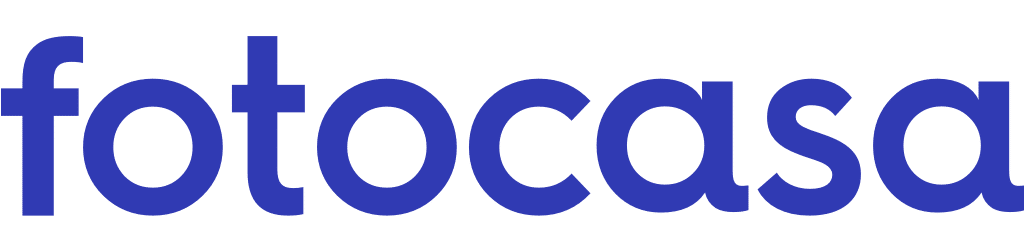

In [36]:
print(soup.prettify())

In [ ]:
url_2 ='https://www.milanuncios.com/venta-de-pisos-en-madrid-madrid/?s=retiro&desde=300000&hasta=500000&orden=relevance&fromSearch=1&hitOrigin=listing'